In [198]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [199]:
torch.cuda.is_available()

True

In [256]:
N = 10000
np.random.seed(69)
x = np.random.binomial(size = N, n = 1, p = 0.5)
np.sum(x)

4973

In [212]:
def survival_func(t, x):
    return np.exp(-2*t) * ((x == 0) + 0) + np.exp(-2 * t ** 2) * ((x == 1) + 0)

def CDF(t, x):
    return (1 - survival_func(t, x))

In [213]:
t = np.linspace(0, 2, N)
Sxt = survival_func(t, x)
Sxt

array([1.00000000e+00, 9.99999920e-01, 9.99200240e-01, ...,
       1.83302987e-02, 1.83229673e-02, 3.35462628e-04])

In [214]:
idx = (x == 0)
idx

array([ True, False,  True, ...,  True,  True, False])

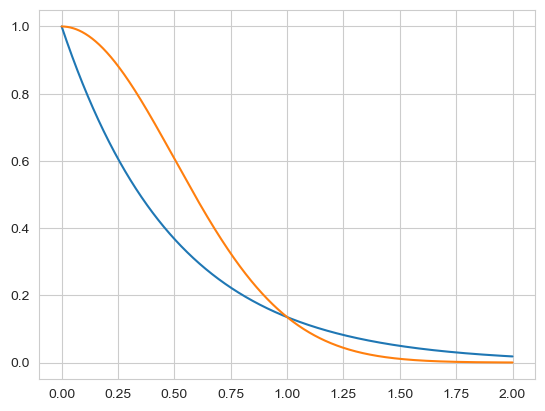

In [215]:
plt.plot(t[idx], Sxt[idx])
plt.plot(t[~idx], Sxt[~idx])

In [358]:
def F_inv(u, x):
    n = len(u)
    t = np.zeros(n)
    for i in range(n):
        if x[i] == 0:
            t[i] = -np.log(1-u[i])/2
            # t[i] = -np.log(u[i])/2
        elif x[i] == 1:
            t[i] = np.sqrt(-np.log(1-u[i])/2)
    return t

def find_min(t, c):
    if len(t) == len(c):
        n = len(t)
        y = np.zeros(n)
        for i in range(n):
            y[i] = np.min([t[i], c[i]])
    return y

# generate training data
np.random.seed(69)
x_train = np.random.binomial(size = N, n = 1, p = 0.5)
u = np.random.uniform(0, 1, N)
t_train = F_inv(u, x_train)
c_train = np.random.uniform(0, 2, N)
delta_train = (t_train <= c_train) + 0
y_train = find_min(t_train, c_train)
# generate validation data
u = np.random.uniform(0, 1, 2000)
x_val = np.random.binomial(size = 2000, n = 1, p = 0.5)
t_val = F_inv(u, x_val)
c_val = np.random.uniform(0, 2, 2000)
delta_val = (t_val <= c_val) + 0
y_val = find_min(t_val, c_val)
# generate testing data
np.random.seed(18)
u = np.random.uniform(0, 1, 2000)
x_test = np.random.binomial(size = 2000, n = 1, p = 0.5)
t_test = F_inv(u, x_test)
c_test = np.random.uniform(0, 2, 2000)
delta_test = (t_test <= c_test) + 0
y_test = find_min(t_test, c_test)

In [357]:
np.max(y_train)

1.9439475455287216

In [14]:
from numpy import load

data = load('data/support/train_1.npz')
arr_0_full = data["arr_0"]
arr_0_full.shape

(5370, 27)

In [369]:
# save training file
idx_train = (x_train == 0)
arr_0 = x_train[idx_train]
arr_1 = np.c_[y_train[idx_train], delta_train[idx_train]]
arr_0 = np.reshape(arr_0, (-1, 1))
np.savez('data/simulation/train_1', arr_0, arr_1)

In [370]:
# save validation file
idx_val = (x_val == 0)
arr_0 = x_val[idx_val]
arr_1 = np.c_[y_val[idx_val], delta_val[idx_val]]
arr_0 = np.reshape(arr_0, (-1, 1))
np.savez('data/simulation/valid_1', arr_0, arr_1)

In [371]:
# save testing file
idx_test = (x_test == 0)
arr_0 = x_test[idx_test]
arr_1 = np.c_[y_test[idx_test], delta_test[idx_test]]
arr_0 = np.reshape(arr_0, (-1, 1))
np.savez('data/simulation/test_1', arr_0, arr_1)

## split 2

In [377]:
arr_0 = x_train[~idx_train]
arr_1 = np.c_[y_train[~idx_train], delta_train[~idx_train]]
arr_0 = np.reshape(arr_0, (-1, 1))
np.savez('data/simulation/train_2', arr_0, arr_1)

In [378]:
arr_0 = x_val[~idx_val]
arr_1 = np.c_[y_val[~idx_val], delta_val[~idx_val]]
arr_0 = np.reshape(arr_0, (-1, 1))
np.savez('data/simulation/valid_2', arr_0, arr_1)

In [379]:
arr_0 = x_test[~idx_test]
arr_1 = np.c_[y_test[~idx_test], delta_test[~idx_test]]
arr_0 = np.reshape(arr_0, (-1, 1))
np.savez('data/simulation/test_2', arr_0, arr_1)

## split 3

In [394]:
arr_0 = x_train
arr_1 = np.c_[y_train, delta_train]
arr_0 = np.reshape(arr_0, (-1, 1))
np.savez('data/simulation/train_3', arr_0, arr_1)

In [395]:
arr_0 = x_val
arr_1 = np.c_[y_val, delta_val]
arr_0 = np.reshape(arr_0, (-1, 1))
np.savez('data/simulation/valid_3', arr_0, arr_1)

In [396]:
arr_0 = x_test
arr_1 = np.c_[y_test, delta_test]
arr_0 = np.reshape(arr_0, (-1, 1))
np.savez('data/simulation/test_3', arr_0, arr_1)

In [397]:
# verify exported data file
data = load('data/simulation/train_3.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])
    print(data[item].shape)

arr_0
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]]
(10000, 1)
arr_1
[[0.1178165  1.        ]
 [0.47074931 1.        ]
 [0.11739286 1.        ]
 ...
 [0.06750531 1.        ]
 [0.01948889 1.        ]
 [0.63714472 1.        ]]
(10000, 2)


In [333]:
sum(delta_test)

1511

In [319]:
def get_output(trial, split):
    path = "data/simulation/models/best_ckpt__ode__support__rec_mlp__%d" % trial + "__split_%d__seed_1.pt" % split
    model = torch.load(path)
    outputs = model["model_output"]
    eval_t = outputs["eval_t"]
    eval_t = eval_t.cpu().detach().numpy()
    cum_hazard_seqs = outputs["cum_hazard_seqs"]
    size = cum_hazard_seqs.size()[0]
    cum_hazard_seqs = cum_hazard_seqs[:, size - 1].cpu().detach().numpy()
    return eval_t, cum_hazard_seqs

In [381]:
eval_t_0, Lambda_0 = get_output(0, 1)
eval_t_1, Lambda_1 = get_output(1, 1)
eval_t_2, Lambda_2 = get_output(2, 1)
eval_t_3, Lambda_3 = get_output(3, 1)
eval_t_4, Lambda_4 = get_output(4, 1)
eval_t_5, Lambda_5 = get_output(5, 1)
eval_t_6, Lambda_6 = get_output(6, 1)
eval_t_7, Lambda_7 = get_output(7, 1)
eval_t_8, Lambda_8 = get_output(8, 1)
eval_t_9, Lambda_9 = get_output(9, 1)
lis=[Lambda_0, Lambda_1, Lambda_2, Lambda_3, Lambda_4, Lambda_5, Lambda_6, Lambda_7, Lambda_8, Lambda_9]
mean=[]
for i in zip(*lis):
    mean.append(sum(i)/len(i))

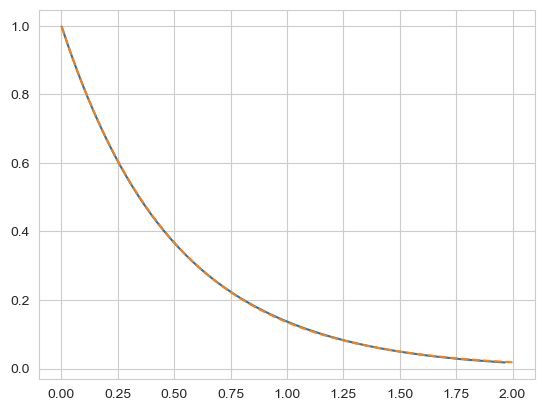

In [385]:
Lambda = np.asarray(mean).reshape(1018)
t = np.linspace(0.001, 2, N)
x = np.zeros(N)
plt.plot(eval_t_0, np.exp(-Lambda))
plt.plot(t, survival_func(t,x), linestyle='dashed')

In [391]:
eval2_t_0, Lambda2_0 = get_output(0, 2)
eval2_t_1, Lambda2_1 = get_output(1, 2)
eval2_t_2, Lambda2_2 = get_output(2, 2)
eval2_t_3, Lambda2_3 = get_output(3, 2)
eval2_t_4, Lambda2_4 = get_output(4, 2)
eval2_t_5, Lambda2_5 = get_output(5, 2)
eval2_t_6, Lambda2_6 = get_output(6, 2)
eval2_t_7, Lambda2_7 = get_output(7, 2)
eval2_t_8, Lambda2_8 = get_output(8, 2)
eval2_t_9, Lambda2_9 = get_output(9, 2)
lis2 = [Lambda2_0, Lambda2_1, Lambda2_2, Lambda2_3, Lambda2_4, Lambda2_5, Lambda2_6, Lambda2_7, Lambda2_8, Lambda2_9]
mean2 = []
for i in zip(*lis2):
    mean2.append(sum(i)/len(i))

In [392]:
len(mean2)

982

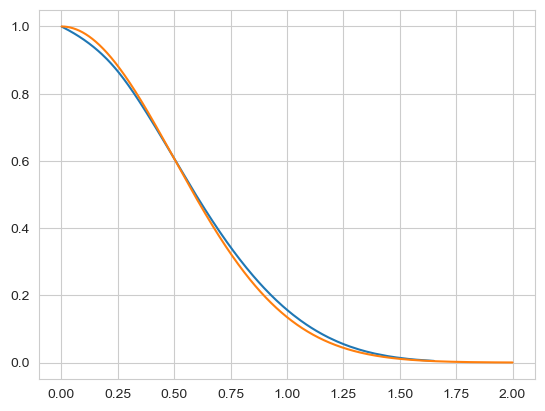

In [393]:
Lambda2 = np.asarray(mean2).reshape(982)
t = np.linspace(0.001, 2, N)
x = np.zeros(N) + 1
plt.plot(eval2_t_0, np.exp(-Lambda2))
plt.plot(t, survival_func(t, x))

In [398]:
model = torch.load("data/simulation/models/best_ckpt__ode__support__rec_mlp__0__split_3__seed_1.pt")
outputs = model["model_output"]
eval_t = outputs["eval_t"]
survival_seqs = outputs["survival_seqs"]
cum_hazard_seqs = outputs["cum_hazard_seqs"]
survival_seqs.shape

torch.Size([1000, 976])

In [399]:
cum_hazard_seqs.size()

torch.Size([2000, 976])

In [400]:
eval_t.size()

torch.Size([2000])

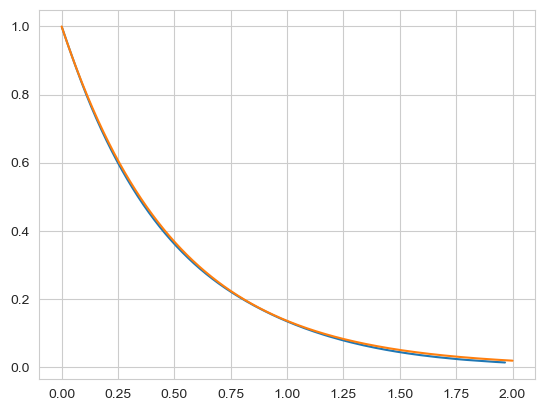

In [402]:
Lambda = cum_hazard_seqs[:, 975].cpu().detach().numpy()
t = np.linspace(0, 2, 2000)
x = np.zeros(2000)
idx = (x_test == 0)
plt.plot(eval_t.cpu().detach().numpy(), np.exp(-Lambda))
plt.plot(t, survival_func(t, x))

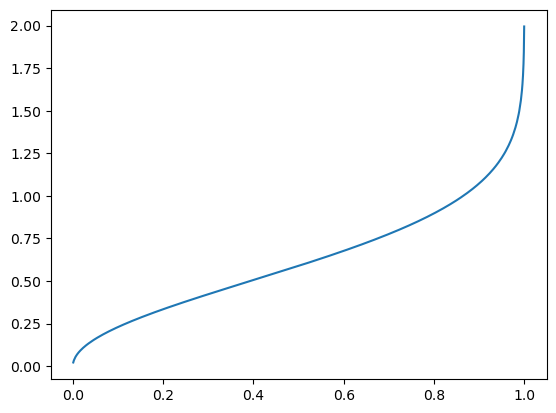

In [179]:
u = np.random.uniform(0, 1, 971)
t = F_inv(u, arr_0)
plt.plot(np.sort(u), np.sort(t))

<Axes: ylabel='Density'>

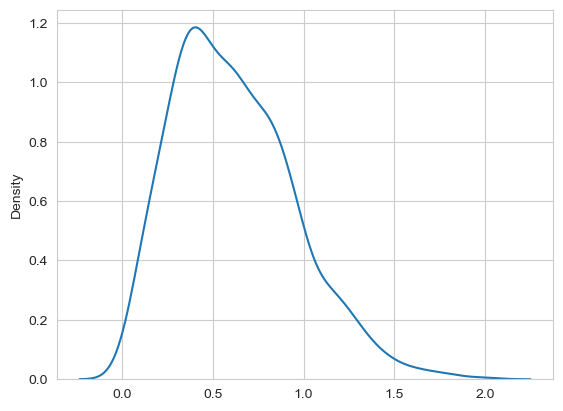

In [182]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(t)